## <span style="color:green">Финальный комментарий<span>
    Спасибо за проделанную работу🤝
    
    Поздравляю, проект принят👍

----------

## Комментарий ревьювера 3

Спасибо за исправления и доработки🤝

Кажется, что не все графики оказались оформлены🤔

Пожалуйста, оформи все имеющиеся в проекте графики, что они имели заголовок, подписи осей и если требуется единицы измерения.

----------

## Комментарий ревьювера 2

Спасибо за исправление пути🤚

В общем ты хорошо справилась с проектом👍

Но в работе присутствуют недочёты, исправляй скорее и отправляй на проверку.

----------

## Комментарий ревьювера

Татьяна, привет! 

Меня зовут, Олег Юрьев, я буду проверять твой проект.

Спасибо, что сдал проект вовремя. При попытке выполнить проект, возникает ошибка `FileNotFoundError`. Пожалуйста, не забывай менять путь к данным с локального на проектный. Исправляй скорее и отправляй на проверку🤚

В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:
## <span style="color:green">Отличная работа<span>
    Безупречная работа
## <span style="color:orange">Что можно улучшить<span>
    Данные пункты работают нормально, но есть способы улучшить.
## <span style="color:red">Что нужно доработать<span>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.
 
Не удаляй комментарии, так будем следить за динамикой =)
   
    
Поехали! :)

---------

# Описание данных
Данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.


# План
Постройте отчёты и посчитайте метрики

Продукт
 - Сколько людей пользуются в день, неделю, месяц?
 - Сколько сессий в день?
 - Сколько длится одна сессия?
 - Как часто люди возвращаются?

Продажи
 - Когда люди начинают покупать?
 - Сколько раз покупают за период?
 - Какой средний чек?
 - Сколько денег приносят? (LTV)

Маркетинг
 - Сколько денег потратили? Всего / на каждый источник / по времени
 - Сколько стоило привлечение одного покупателя из каждого источника?
 - На сколько окупились расходы? (ROI)
 
 Отобразите на графиках, как эти метрики отличаются 
   - по устройствам 
   - по рекламным источникам? 
   - Как они меняются во времени?

# Шаг 1 Импорт данных

In [1]:
import pandas as pd

In [2]:
#costs_data = pd.read_csv('D:\Работа\Яндекс.Практикум\Проекты\Анализ бизнес показателей\costs.csv')
costs_data = pd.read_csv('/datasets/costs.csv')
#orders_log_data = pd.read_csv('D:\Работа\Яндекс.Практикум\Проекты\Анализ бизнес показателей\orders_log.csv')
orders_log_data = pd.read_csv('/datasets/orders_log.csv')

In [3]:
#visits_log_data = pd.read_csv('D:\Data\log.csv')
visits_log_data = pd.read_csv('/datasets/visits_log.csv')

In [4]:
print(costs_data.head(10))
costs_data.info()

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
5          1  2017-06-06  40.39
6          1  2017-06-07  40.59
7          1  2017-06-08  56.63
8          1  2017-06-09  40.16
9          1  2017-06-10  43.24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [5]:
costs_data['dt']= pd.to_datetime(costs_data['dt'])
costs_data['source_id']= costs_data['source_id'].astype('int')
print(costs_data.head())

   source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08


In [6]:
print(orders_log_data.head(5))
orders_log_data.info()

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
orders_log_data.set_axis(['buy_ts', 'revenue', 'uid'], axis = 'columns', inplace=True)
orders_log_data['buy_ts']= pd.to_datetime(orders_log_data['buy_ts'])
orders_log_data['uid'] = orders_log_data['uid'].astype('object')
print(orders_log_data.head(5))
orders_log_data.info()

               buy_ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB


In [8]:
orders_log_data.describe().T

,count,mean,std,min,25%,50%,75%,max
revenue,50415.0,4.999647,21.818359,0.0,1.22,2.5,4.89,2633.28


In [9]:
costs_data['costs'].describe().T

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64

In [10]:
costs_data.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [11]:
costs_data.loc[costs_data['costs']>1000]

,source_id,dt,costs
902,3,2017-11-24,1788.28
919,3,2017-12-11,1061.18


In [12]:
costs_data['dt'].describe().T

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

In [13]:
orders_log_data['buy_ts'].describe().T

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [14]:
orders_log_data['buy_ts'].sort_values().tail(5)

50410   2018-05-31 23:50:00
50411   2018-05-31 23:50:00
50412   2018-05-31 23:54:00
50413   2018-05-31 23:56:00
50414   2018-06-01 00:02:00
Name: buy_ts, dtype: datetime64[ns]

In [15]:
#Покупка на июнь 2018 только одна, удаляем ее
orders_log_data = orders_log_data.loc[orders_log_data['buy_ts'] != '2018-06-01 00:02:00']
orders_log_data['buy_ts'].describe().T

count                   50414
unique                  45990
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-05-31 23:56:00
Name: buy_ts, dtype: object

## <span style="color:orange">Что можно улучшить<span>

Обратил внимание, что ты `uid` - перевела в строку. На малом объеме данных, так можно поступить, но если объем будет большой, не стоит так сильно расходовать память. Ниже, метод `sys.getsizeof` - выводит размер объектов в байтах. То есть при такой операции кол-во используемоц памяти вырастет почти вдвое 😔

In [16]:
import sys

In [17]:
sys.getsizeof("16109239769442553005"), sys.getsizeof(16109239769442553005)

(69, 36)

### Visits

In [18]:
display(visits_log_data.head(5))
visits_log_data.info()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [19]:
visits_log_data.set_axis(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], axis = 'columns', inplace=True)
visits_log_data['end_ts']= pd.to_datetime(visits_log_data['end_ts'])
visits_log_data['start_ts']= pd.to_datetime(visits_log_data['start_ts'])
visits_log_data['uid'] = visits_log_data['uid'].astype('object')
visits_log_data['source_id'] = visits_log_data['source_id'].astype('object')
display(visits_log_data.head(5))
visits_log_data.info()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null object
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null object
dtypes: datetime64[ns](2), object(3)
memory usage: 13.7+ MB


In [20]:
visits_log_data.describe().T

,count,unique,top,freq,first,last
device,359400,2,desktop,262567,NaT,NaT
end_ts,359400,224760,2017-11-24 16:51:00,23,2017-06-01 00:02:00,2018-06-01 01:26:00
source_id,359400,9,4,101794,NaT,NaT
start_ts,359400,224303,2017-11-24 16:06:00,19,2017-06-01 00:01:00,2018-05-31 23:59:00
uid,359400,228169,1.28698e+19,893,NaT,NaT


In [21]:
visits_log_data['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [22]:
visits_log_data['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

In [23]:
costs_data['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

На 6 и  источник приходится мало сессий, а в затратах его нет, убиваем его.

In [24]:
visits_log_data = visits_log_data.loc[visits_log_data['source_id'] != 6]

In [25]:
source_id_pivot = visits_log_data.pivot_table(index='uid', values='source_id', aggfunc='nunique')
source_id_pivot.loc[source_id_pivot['source_id']>1].head(5)

,source_id,uid
uid,,
1260655184775459,2,1
2471247936243530,2,1
2892676062023446,3,1
3605148382144603,3,1
4735760515861892,2,1


In [26]:
visits_log_data.loc[visits_log_data['uid']==18446156210226471712]

,device,end_ts,source_id,start_ts,uid
6242,desktop,2017-11-07 10:04:00,3,2017-11-07 10:01:00,18446156210226471712
83631,desktop,2017-11-07 12:54:00,4,2017-11-07 12:52:00,18446156210226471712
97867,desktop,2018-02-20 13:24:00,1,2018-02-20 12:47:00,18446156210226471712
199896,desktop,2018-02-08 16:18:00,1,2018-02-08 15:48:00,18446156210226471712
215232,desktop,2018-02-14 21:47:00,5,2018-02-14 21:05:00,18446156210226471712
247710,desktop,2018-02-24 09:37:00,4,2018-02-24 09:36:00,18446156210226471712
265059,touch,2018-02-19 11:26:00,1,2018-02-19 10:17:00,18446156210226471712


На один uid может приходиться несколько источников и дейвасов

In [27]:
visits_log_data['session_duration_sec'] = (visits_log_data['end_ts'] - visits_log_data['start_ts']).dt.total_seconds()
visits_log_data['session_duration_sec'].sort_values()

177972    -2760.0
4181      -1920.0
309827        0.0
88717         0.0
223932        0.0
           ...   
221945    31440.0
1197      32520.0
248062    32880.0
177381    35760.0
229891    42660.0
Name: session_duration_sec, Length: 359394, dtype: float64

In [28]:
visits_log_data = visits_log_data[visits_log_data['session_duration_sec']> -1]

In [29]:
visits_log_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359399
Data columns (total 6 columns):
device                  359392 non-null object
end_ts                  359392 non-null datetime64[ns]
source_id               359392 non-null object
start_ts                359392 non-null datetime64[ns]
uid                     359392 non-null object
session_duration_sec    359392 non-null float64
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 19.2+ MB


## <span style="color:red">Что нужно доработать<span>

Логичнее отделить обзор данных от предобработки и каких-либо агрегатов🙃

После такого расширенного обзора хочется увидеть вывод, в котором будет описано, всё что найдено😀

Попробуй изучить методы `display`, `HTML`, `to_html()` - они помогут оформлять красивый вывод расчетов без переносов - https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html?highlight=display#IPython.display.display

 - в таблицах пропущенных значений нет
 - Названия стоблцов приведены к общему типу
 - Есть 9 источников, из которых пришли посетители, но при из шестого пришло настолько мало посетителей, что мы мы его убили
 - убрали две записи, где дата завершения сессии меньше даты начала сессии
 - один uid может заходить с разных девайсов и разных источников
 - сессий, приходящийся на десктоп, больше чем, сессий из touch

# Продукт

- Сколько людей пользуются в день, неделю, месяц?
 Отобразите на графиках, как эти метрики отличаются 
   - по устройствам 
   - по рекламным источникам? 
   - Как они меняются во времени?

In [30]:
#Добавим столбцы день, недели, месяца, года
visits_log_data['session_date'] = visits_log_data['start_ts'].dt.date
visits_log_data['session_week'] = visits_log_data['start_ts'].astype('datetime64[W]')
visits_log_data['session_month'] = visits_log_data['start_ts'].astype('datetime64[M]') 
#visits_log_data['session_year'] = visits_log_data['start_ts'].dt.year
display(visits_log_data.head())

,device,end_ts,source_id,start_ts,uid,session_duration_sec,session_date,session_week,session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680.0,2018-02-19,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.0,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440.0,2018-05-20,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.0,2017-12-27,2017-12-21,2017-12-01


In [31]:
visits_log_data['start_ts'].describe()

count                  359392
unique                 224298
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

In [32]:
# DAU WAU MAU по устройствам

dau_device = visits_log_data.groupby(['session_date', 'device',]).agg({'uid': 'nunique'}).reset_index()
wau_device = visits_log_data.groupby(['device', 'session_week']).agg({'uid': 'nunique'}).reset_index()
mau_device = visits_log_data.groupby(['device', 'session_month']).agg({'uid': 'nunique'}).reset_index()

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Количество пользователей')

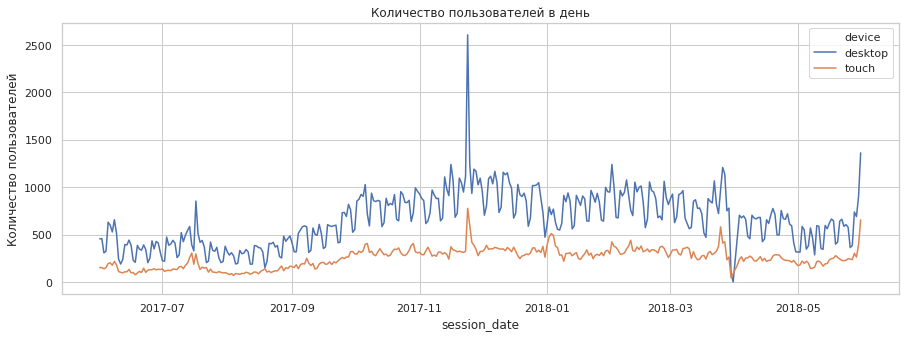

In [34]:
fig = plt.figure(figsize = (15,5))
dau_device_fig = sns.lineplot(data = dau_device, x='session_date', y='uid', hue='device', palette='deep')
dau_device_fig.set_title("Количество пользователей в день")
plt.ylabel("Количество пользователей")


In [35]:
print((dau_device.sort_values(by='uid', ascending=False)).head(1))

    session_date   device   uid
352   2017-11-24  desktop  2605


In [36]:
print((dau_device.sort_values(by='uid')).head(1))

    session_date   device  uid
606   2018-03-31  desktop    1


Text(0, 0.5, 'Количество пользователей')

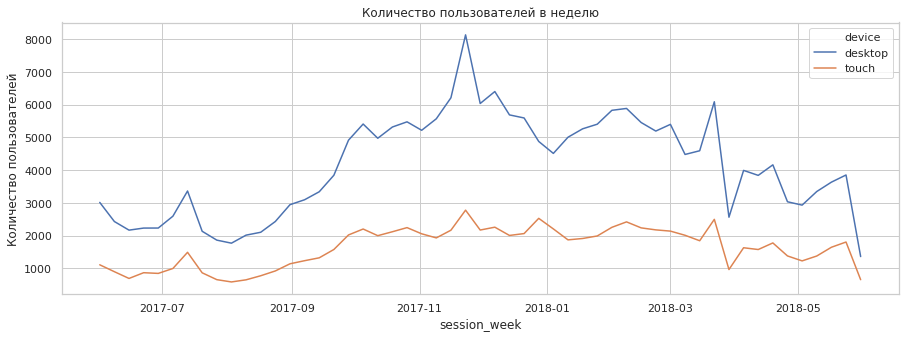

In [37]:
fig = plt.figure(figsize = (15,5))
wau_device_fig = sns.lineplot(data = wau_device, x='session_week', y='uid', hue='device', palette='deep')
wau_device_fig.set_title("Количество пользователей в неделю")
plt.ylabel("Количество пользователей")

Text(0, 0.5, 'Количество пользователей')

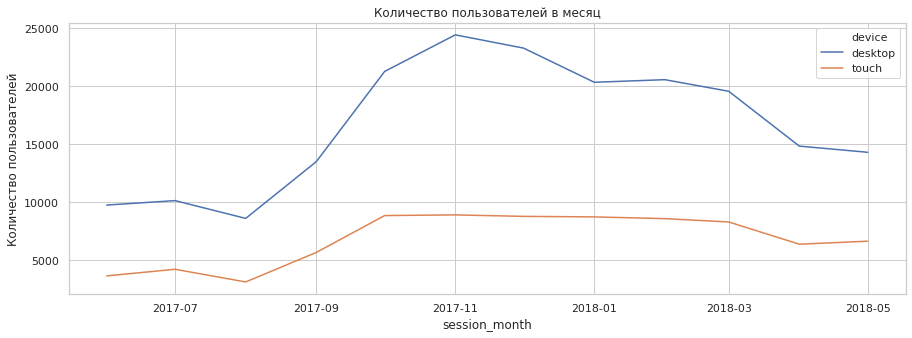

In [38]:
fig = plt.figure(figsize = (15,5))
mau_device_fig = sns.lineplot(data = mau_device, x='session_month', y='uid', hue='device')
mau_device_fig.set_title("Количество пользователей в месяц")
plt.ylabel("Количество пользователей")

Трафик по десктопу больше траффика по мобайлу. На дневном графике виден пиковый день в 24 ноября 2017 года, и провальный день в апреле. Возможно в этот день сайт просто лег.
Если смотреть динамику по месяцам, то с июгя по ноябрь наблюдается рост сайта, а затем плавное снижение.

In [39]:
# DAU WAU MAU по рекламным источникам

dau_source = visits_log_data.groupby(['source_id', 'session_date' ]).agg({'uid': 'nunique'}).reset_index()
wau_source = visits_log_data.groupby(['source_id', 'session_week']).agg({'uid': 'nunique'}).reset_index()
mau_source = visits_log_data.groupby(['source_id', 'session_month']).agg({'uid': 'nunique'}).reset_index()

Text(0, 0.5, 'Количество пользователей')

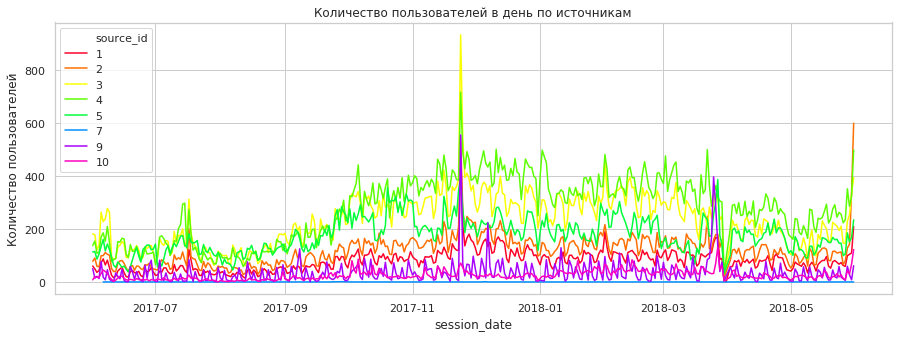

In [40]:
fig = plt.figure(figsize = (15,5))
dau_source_fig = sns.lineplot(data = dau_source, x='session_date', y='uid', palette='gist_rainbow', hue='source_id', legend='full')
dau_source_fig.set_title("Количество пользователей в день по источникам")
plt.ylabel("Количество пользователей")

Text(0, 0.5, 'Количество пользователей')

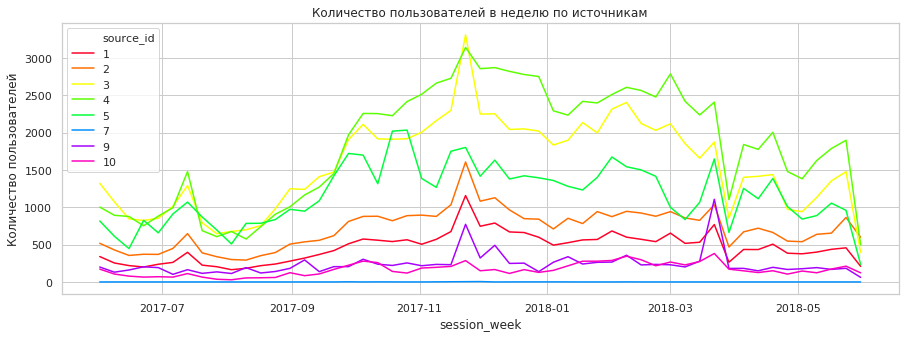

In [41]:
fig = plt.figure(figsize = (15,5))
wau_source_fig =  sns.lineplot(data = wau_source, x='session_week', y='uid', hue='source_id', legend='full', palette='gist_rainbow')
wau_source_fig.set_title("Количество пользователей в неделю по источникам")
plt.ylabel("Количество пользователей")

Text(0, 0.5, 'Количество пользователей')

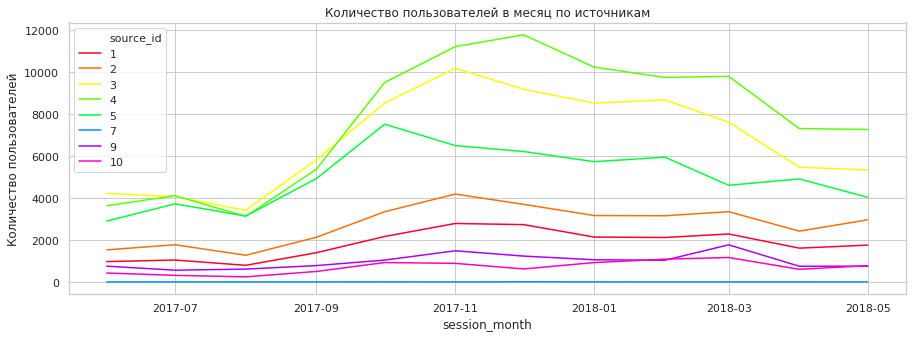

In [42]:
fig = plt.figure(figsize = (15,5))
mau_source_fig = sns.lineplot(data = mau_source, x='session_month', y='uid', hue='source_id', palette='gist_rainbow', legend='full')
mau_source_fig.set_title("Количество пользователей в месяц по источникам")
plt.ylabel("Количество пользователей")

In [43]:
source_id_count = visits_log_data.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
nunique_all = visits_log_data['uid'].nunique()
source_id_count['percent'] = (source_id_count['uid']/nunique_all)*100
print(source_id_count)

   source_id    uid    percent
0          1  18999   8.326759
1          2  26245  11.502489
2          3  74756  32.763578
3          4  83525  36.606798
4          5  56974  24.970197
5          7     34   0.014901
6          9   9264   4.060166
7         10   8067   3.535553


Наибольшее количество посетителей пользовались (37%), 3(33%) и 5 (25%) источником (Посетили могут пользоваться разными источниками)

## <span style="color:red">Что нужно доработать<span>

На равне с графиками, которые отражают динамику выбранного показателя, здорово было бы видеть среднее значение🙂

In [44]:
print('DAU {:.0f}'.format(dau_device['uid'].median() ))
print('WAU {:.0f}'.format(wau_device['uid'].median() ))
print('MAU {:.0f}'.format(mau_device['uid'].median() ))
print()
print('DAU desktop {:.0f}'.format(dau_device.loc[dau_device['device']=='desktop']['uid'].median() ))
print('DAU touch {:.0f}'.format(dau_device.loc[dau_device['device']=='touch']['uid'].median() ))
print()

print('WAU desktop {:.0f}'.format(wau_device.loc[wau_device['device']=='desktop']['uid'].median() ))
print('WAU touch {:.0f}'.format(wau_device.loc[wau_device['device']=='touch']['uid'].median() ))
print()

print('MAU desktop {:.0f}'.format(mau_device.loc[mau_device['device']=='desktop']['uid'].median() ))
print('MAU touch {:.0f}'.format(mau_device.loc[mau_device['device']=='touch']['uid'].median() ))



DAU 347
WAU 2232
MAU 8884

DAU desktop 649
DAU touch 264

WAU desktop 4162
WAU touch 1805

MAU desktop 17209
MAU touch 7475


In [45]:
print('DAU')
display(dau_source.pivot_table(columns='source_id', values='uid', aggfunc='median'))
print('WAU')
display(wau_source.pivot_table(columns='source_id', values='uid', aggfunc='median'))
print('MAU')
display(mau_source.pivot_table(columns='source_id', values='uid', aggfunc='median'))

DAU


source_id,1,2,3,4,5,7,9,10
uid,79,119,236,294,169,1,22,22


WAU


source_id,1,2,3,4,5,7,9,10
uid,494,721,1478,1971,1116,1,204,151


MAU


source_id,1,2,3,4,5,7,9,10
uid,1938.5,3061.5,6723.5,8415.5,4923.0,2.0,908.5,699.0


### Сессии
- Сколько сессий в день?
- Сколько длится одна сессия?

In [46]:
visits_log_data.head()

,device,end_ts,source_id,start_ts,uid,session_duration_sec,session_date,session_week,session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1080.0,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,1680.0,2018-02-19,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,0.0,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,1440.0,2018-05-20,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,0.0,2017-12-27,2017-12-21,2017-12-01


In [47]:
sessions_per_day = visits_log_data.groupby('session_date').agg({'uid': 'count'}).reset_index()
print(sessions_per_day.head())

  session_date  uid
0   2017-06-01  664
1   2017-06-02  658
2   2017-06-03  477
3   2017-06-04  510
4   2017-06-05  893


Text(0, 0.5, 'Количество пользователей')

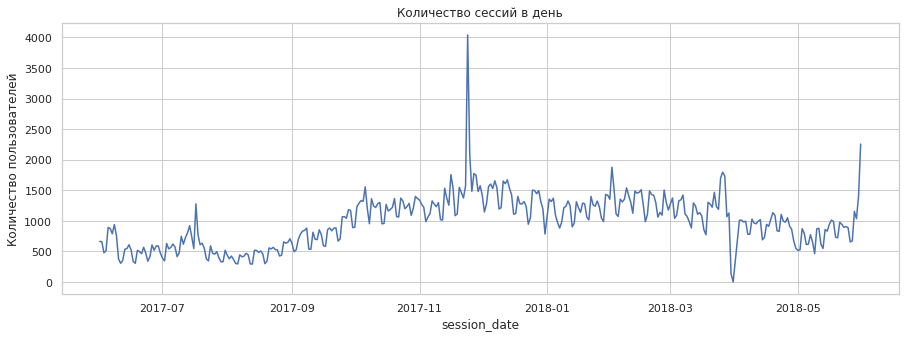

In [48]:
fig = plt.figure(figsize = (15,5))
session_p_day_fig = sns.lineplot(data = sessions_per_day, x='session_date', y='uid', palette='gist_rainbow')
session_p_day_fig.set_title("Количество сессий в день")
plt.ylabel("Количество пользователей")

In [49]:
sessions_per_day['uid'].mean()

987.3406593406594

Среднее количество сессиий в день 987.

In [50]:
#visits_log_data['session_duration_sec'] = (visits_log_data['end_ts'] - visits_log_data['start_ts']).dt.seconds
print(visits_log_data['session_duration_sec'].mean()/60)

10.71716918202594


In [51]:
#visits_log_data['session_duration_sec'] = (visits_log_data['end_ts'] - visits_log_data['start_ts']).dt.total_seconds()
#print(visits_log_data['session_duration_sec'].mean()/60)

Text(0, 0.5, 'Количество сессий данной продолжительности')

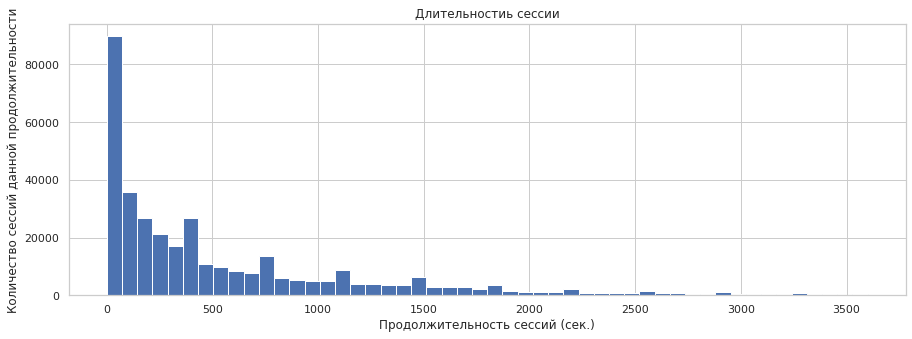

In [52]:
fig = plt.figure(figsize = (15,5))
sess_dur_fig = visits_log_data['session_duration_sec'].hist(bins=50, range=(0, 3600), label='длинна сессии')
sess_dur_fig .set_title("Длительностиь сессии")
plt.xlabel("Продолжительность сессий (сек.)")
plt.ylabel("Количество сессий данной продолжительности") 

In [53]:
visits_log_data.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid',
       'session_duration_sec', 'session_date', 'session_week',
       'session_month'],
      dtype='object')

In [54]:
session_source = visits_log_data.groupby('source_id')['session_duration_sec'].mean().reset_index()
session_source['session_duration_min'] = (session_source['session_duration_sec']/60).round(1)
print(session_source.sort_values(by='session_duration_min', ascending=False))

   source_id  session_duration_sec  session_duration_min
0          1           1039.361156                  17.3
1          2            844.717318                  14.1
7         10            662.443890                  11.0
5          7            606.666667                  10.1
2          3            572.303590                   9.5
6          9            566.286532                   9.4
3          4            559.841042                   9.3
4          5            526.742187                   8.8


Самые длинные сессии из из 1 (17 мин.), второго (14 мин) и 10 источников (11 минут), самые коротки из 4 и 5 (9 минут).

## <span style="color:red">Что нужно доработать<span>

Давай посмотрим на сессию с максимальной длительностью👇

In [55]:
visits_log_data[visits_log_data['session_duration_sec'] == visits_log_data['session_duration_sec'].max()]

,device,end_ts,source_id,start_ts,uid,session_duration_sec,session_date,session_week,session_month
229891,desktop,2017-12-18 22:43:00,3,2017-12-18 10:52:00,15566184277200431914,42660.0,2017-12-18,2017-12-14,2017-12-01


Поэтому вычисленные длительности сессий не могут быть самыми длинными.

Используемый тобой метод `seconds` отлично работает, если есть уверенность, что даты правильные (все даты больше 0), в противном случае метод возвращает кол-во секунд в одном дне.

Посмотри на метод `total_seconds()` - он в любом случаем возвращает кол-во секунд. Попробуй сравнить оба метода, думаю, найдется интересная информация о данных.

# <span style="color:purple">Мои поправки<span>

Удалила отрицательные сессии на уровне предобработки данных.

---------

Text(0.5, 1.0, 'Длительность сессий по устройствам')

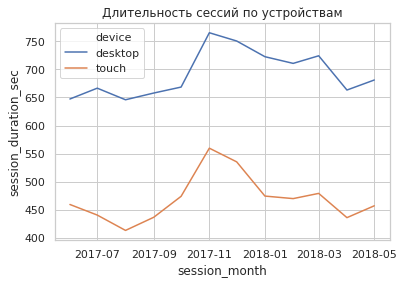

In [56]:
session_length = visits_log_data.groupby(['device', 'session_month'])['session_duration_sec'].mean().reset_index()
device_duration_fig = sns.lineplot(data = session_length, x='session_month', y='session_duration_sec', hue='device', palette='deep')
device_duration_fig.set_title("Длительность сессий по устройствам")

In [57]:
visits_log_data.groupby('device')['session_duration_sec'].mean()/60

device
desktop    11.721580
touch       7.993708
Name: session_duration_sec, dtype: float64

На десктопе люди дольше проводят времени (почти 12 минут, в то время как на touch в среднем 8 минут). 

## Retention
- Как часто люди возвращаются?

In [58]:
#first_activity_month = visits_log_data.groupby('uid')['session_month'].min()
#first_activity_month.name = 'first_activity_month'

In [59]:
#visits_log_data = visits_log_data.join(first_activity_month, on='uid')

In [60]:
import numpy as np

In [61]:
users = (visits_log_data.sort_values(by = ['uid', 'start_ts'])
         .groupby('uid')
         .agg({'start_ts': 'first', 'source_id': 'first', 'device': 'first'}).reset_index())
users['start_ts'] = users['start_ts'].astype('datetime64[M]') 
users.columns = ['uid', 'first_activity_month', 'first_source', 'first_device']
print(users.head())

               uid first_activity_month  first_source first_device
0   11863502262781           2018-03-01             3        touch
1   49537067089222           2018-02-01             2        touch
2  297729379853735           2017-06-01             3      desktop
3  313578113262317           2017-09-01             2      desktop
4  325320750514679           2017-09-01             5      desktop


In [62]:
visits_log_data = visits_log_data.merge(users, on='uid')

In [63]:
visits_log_data['cohort_lifetime'] = visits_log_data['session_month'] - visits_log_data['first_activity_month']
visits_log_data['cohort_lifetime'] = visits_log_data['cohort_lifetime'] / np.timedelta64(1,'M')
visits_log_data['cohort_lifetime'] = visits_log_data['cohort_lifetime'].round().astype('int')

In [64]:
visits_log_data['cohort_lifetime'].value_counts().T

0     267853
1      23293
2      14832
3      11961
4       9976
5       8497
6       6834
7       5290
8       4009
9       3036
10      2193
11      1618
Name: cohort_lifetime, dtype: int64

In [65]:
#Сгруппируем данные по когорте и lifetime
cohorts = visits_log_data.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [66]:
#Найдём исходное количество пользователей в когорте
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
print(initial_users_count)

   first_activity_month  cohort_users
0            2017-06-01         13259
12           2017-07-01         13139
23           2017-08-01         10181
33           2017-09-01         16704
42           2017-10-01         25977
50           2017-11-01         27248
57           2017-12-01         25268
63           2018-01-01         22624
68           2018-02-01         22197
72           2018-03-01         20589
75           2018-04-01         15709
77           2018-05-01         15273


In [67]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')

In [68]:
#посчитаем retention
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
cohorts['first_activity_month'] = cohorts['first_activity_month'].dt.strftime('%Y-%m')

In [69]:
retention_pivot = cohorts.pivot_table(index='first_activity_month', columns='cohort_lifetime',values='retention',aggfunc='sum')


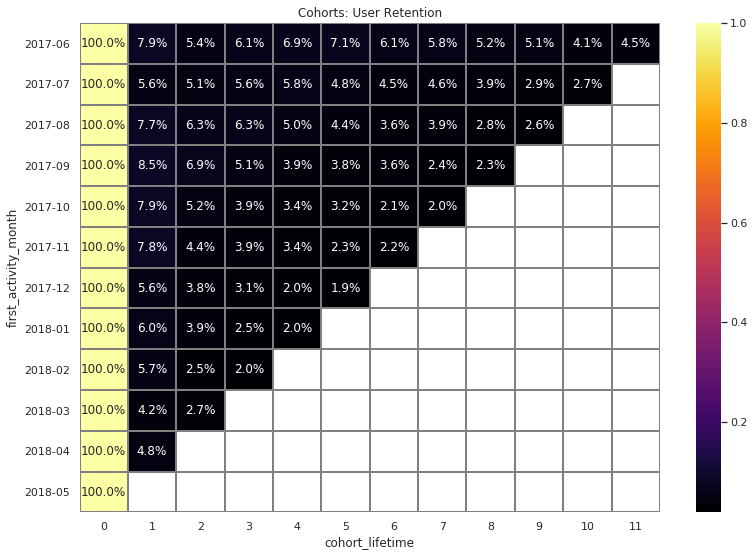

In [70]:
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='inferno')

Если смотерть на 5 период жизни, то по имеющимся данным retention падает с 7 июньской когорты на 2 процентов в декабрьской когорте.

### Retention по девайсам

In [71]:
#когорты устройства
cohorts_device = visits_log_data.groupby(['first_device', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [72]:
#Найдём исходное количество пользователей в когорте
initial_users_count_device = cohorts_device[cohorts_device['cohort_lifetime'] == 0][['first_device','uid']]
initial_users_count_device = initial_users_count_device.rename(columns={'uid':'cohort_device_users'})
print(initial_users_count_device)

   first_device  cohort_device_users
0       desktop               160794
12        touch                67374


In [73]:
cohorts_device = cohorts_device.merge(initial_users_count_device, on='first_device')

In [74]:
print(cohorts_device)

   first_device  cohort_lifetime     uid  cohort_device_users
0       desktop                0  160794               160794
1       desktop                1   10016               160794
2       desktop                2    6466               160794
3       desktop                3    5192               160794
4       desktop                4    4273               160794
5       desktop                5    3568               160794
6       desktop                6    2707               160794
7       desktop                7    2088               160794
8       desktop                8    1469               160794
9       desktop                9    1047               160794
10      desktop               10     700               160794
11      desktop               11     475               160794
12        touch                0   67374                67374
13        touch                1    3799                67374
14        touch                2    2247                67374
15      

In [75]:
#посчитаем retention
cohorts_device['retention'] = cohorts_device['uid']/cohorts_device['cohort_device_users']

In [76]:
retention_pivot_device = cohorts_device.pivot_table(index='first_device', columns='cohort_lifetime',values='retention',aggfunc='sum')

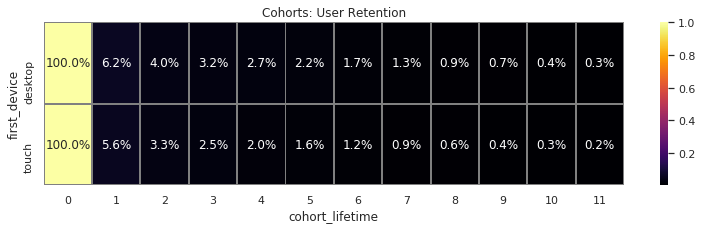

In [77]:
plt.figure(figsize=(13, 3))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot_device, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='inferno')

Пользователи desktop возвразаются немного чаще, чем пользователи touch. Разнцица составляет коло 0.5%

### Retention по источникам

In [78]:
# считаем retention по source
cohorts_source = visits_log_data.groupby(['first_source', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count_source = cohorts_source[cohorts_source['cohort_lifetime'] == 0][['first_source','uid']]
initial_users_count_source = initial_users_count_source.rename(columns={'uid':'cohort_source_users'})
cohorts_source = cohorts_source.merge(initial_users_count_source, on='first_source')
cohorts_source['retention'] = cohorts_source['uid']/cohorts_source['cohort_source_users']
retention_pivot_source = cohorts_source.pivot_table(index='first_source', columns='cohort_lifetime',values='retention',aggfunc='sum')

In [79]:
print(initial_users_count_source)

    first_source  cohort_source_users
0              1                 9470
12             2                17616
24             3                66116
36             4                72346
48             5                49237
60             7                   32
63             9                 6448
75            10                 6903


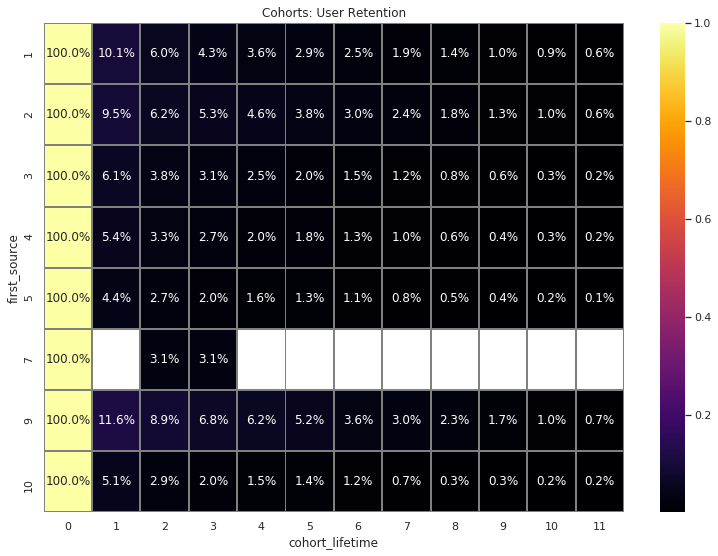

In [80]:
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot_source, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='inferno')

Лучше всего себя показал первый, второй и девятый источник. В первый месяц в этих когортах вернулись около 10%, в то время как из других источников около 5%.

# Продажи

- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

In [81]:
orders_log_data.head(5)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [82]:
costs_data.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### Когда люди начинают покупать?

In [83]:
first_activity_log = visits_log_data.groupby('uid')['start_ts'].min().reset_index()
print(first_activity_log.head())

               uid            start_ts
0   11863502262781 2018-03-01 17:27:00
1   49537067089222 2018-02-06 15:55:00
2  297729379853735 2017-06-07 18:47:00
3  313578113262317 2017-09-18 22:49:00
4  325320750514679 2017-09-30 14:29:00


In [84]:
orders_log_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 3 columns):
buy_ts     50414 non-null datetime64[ns]
revenue    50414 non-null float64
uid        50414 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ MB


In [85]:
first_order = orders_log_data.groupby('uid')['buy_ts'].min().reset_index()
print(first_order.head())

                uid              buy_ts
0   313578113262317 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00
3  2464366381792757 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00


In [86]:
first_order = first_order.merge(first_activity_log, on='uid')
print(first_order.head())

                uid              buy_ts            start_ts
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00


In [87]:
first_order['difference']=first_order['buy_ts']-first_order['start_ts']

In [88]:
first_order['difference'].describe()

count                      36522
mean     16 days 21:40:50.532281
std      47 days 01:45:34.984683
min              0 days 00:00:00
25%              0 days 00:04:00
50%              0 days 00:16:00
75%              2 days 00:17:30
max            363 days 07:04:00
Name: difference, dtype: object

In [89]:
first_order['difference'].describe(percentiles = [0.05, 0.25, 0.5, 0.6, 0.75,  0.9, 0.95, 0.99]).T

count                       36522
mean      16 days 21:40:50.532281
std       47 days 01:45:34.984683
min               0 days 00:00:00
5%                0 days 00:00:00
25%               0 days 00:04:00
50%               0 days 00:16:00
60%               0 days 00:44:00
75%               2 days 00:17:30
90%       58 days 01:56:00.000000
95%      123 days 21:28:59.999999
99%      237 days 21:36:07.200000
max             363 days 07:04:00
Name: difference, dtype: object

In [90]:
#Посчитаеем количество людей у которых на покупку уходит больше дня
more_than_1_day = first_order['difference'].loc[first_order['difference']>'1 day']
more_than_1_day.count()/first_order['difference'].count()

0.27807896610262306

In [91]:
first_order['difference_sec'] = first_order['difference']/np.timedelta64(1,'s')

In [92]:
first_order['difference_sec']= first_order['difference_sec'].astype('int')

Text(0.5, 1.0, 'Сколько уходит на покупку времени (распределение)')

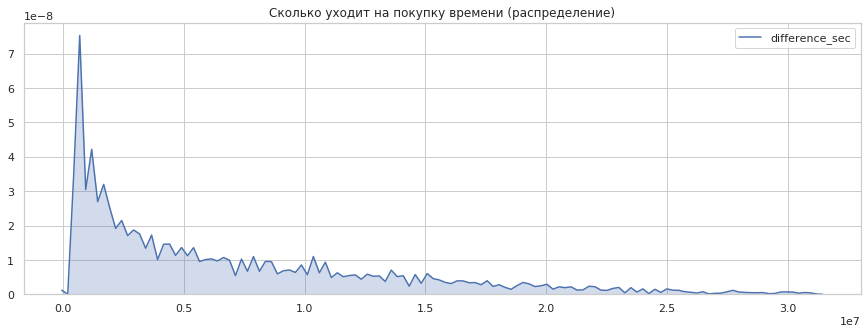

In [93]:
plt.figure(figsize=(15, 5))
snsplot4 = sns.kdeplot(first_order['difference_sec'], shade=True)
fig3 = snsplot4.get_figure()
snsplot4.set_title("Сколько уходит на покупку времени (распределение)")

У половины покупателей на покупку уходит не более 16 минут, но есть большая группа людей у которых на покупки уходит больше одного дня (28%).

## <span style="color:green">Отличная работа<span>
    В этом разделе всё отлично! Здорово, что используешь медиану в качестве оценки времени до покупки.

### Сколько раз покупают за период
среднее число покупок в месяц, неделю, день.

In [94]:
#Выделим месяцы из дат в таблицах с заказами и расходами
orders_log_data['order_month'] = orders_log_data['buy_ts'].astype('datetime64[M]')
orders_log_data['order_week'] = orders_log_data['buy_ts'].astype('datetime64[W]')
orders_log_data['order_day'] = orders_log_data['buy_ts'].astype('datetime64[D]')
display(orders_log_data.head())

,buy_ts,revenue,uid,order_month,order_week,order_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [95]:
orders_daily_count = orders_log_data.groupby('order_day')['buy_ts'].count().reset_index()
orders_daily_count.columns = ['order_day', 'orders_by_day']

Text(0.5, 1.0, 'Заказы по дням')

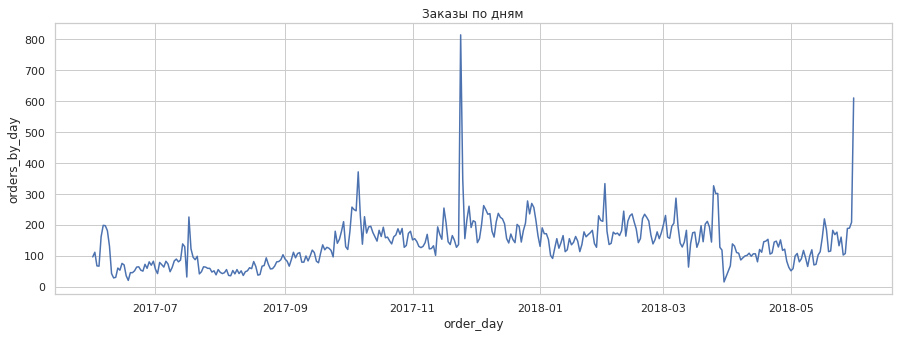

In [96]:
fig = plt.figure(figsize = (15,5))
sns.lineplot(data = orders_daily_count, x='order_day', markers=True, y='orders_by_day', palette='deep').set_title("Заказы по дням")


In [97]:
orders_weekly_count = orders_log_data.groupby('order_week')['buy_ts'].count().reset_index()
orders_weekly_count.columns = ['order_week', 'orders_by_week']

Text(0.5, 1.0, 'Заказы по неделям')

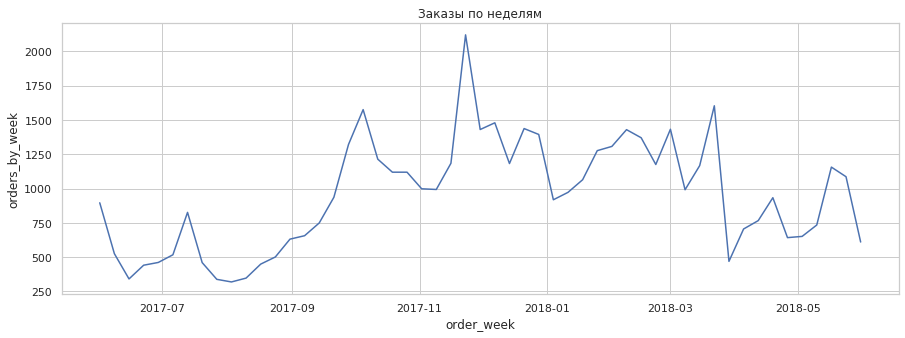

In [98]:
fig = plt.figure(figsize = (15,5))
sns.lineplot(data = orders_weekly_count, x='order_week', markers=True, y='orders_by_week', palette='deep').set_title("Заказы по неделям")

In [99]:
orders_monthly_count = orders_log_data.groupby('order_month')['buy_ts'].count().reset_index()
orders_monthly_count.columns = ['order_month', 'orders_by_month']

Text(0.5, 1.0, 'Заказы по месяцам')

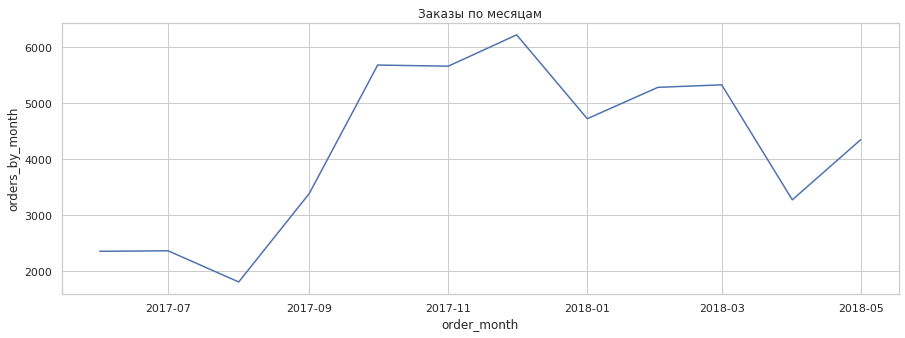

In [100]:
fig = plt.figure(figsize = (15,5))
sns.lineplot(data = orders_monthly_count, x='order_month', markers=True, y='orders_by_month', palette='deep').set_title("Заказы по месяцам")

In [101]:
print(orders_daily_count.mean().round())
print(orders_weekly_count.mean().round())
print(orders_monthly_count.mean().round())

orders_by_day    139.0
dtype: float64
orders_by_week    951.0
dtype: float64
orders_by_month    4201.0
dtype: float64


В среднем посетители совершают 139 покупок в день(все вместе), в неделю 951, в месяц 4201. Динамика покупок соответсвует динамике посещений.

### Средний чек
То же самое, но про среднее число потраченных денег за период (день, неделя, месяц)

Text(0.5, 1.0, 'Средний чек на покупаиеля в день')

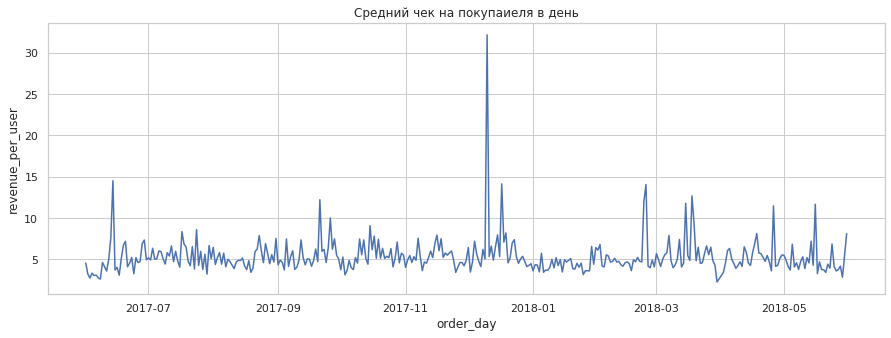

In [102]:
revenue_daily = orders_log_data.groupby('order_day').agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
revenue_daily.columns = ['order_day', 'daily_revenue', 'number_of_users']
revenue_daily['revenue_per_user'] = revenue_daily['daily_revenue']/revenue_daily['number_of_users']
fig = plt.figure(figsize = (15,5))
sns.lineplot(data = revenue_daily, x='order_day', markers=True, y='revenue_per_user', palette='deep').set_title("Средний чек на покупаиеля в день")

In [103]:
revenue_daily.sort_values(by = 'revenue_per_user', ascending=False).head()

,order_day,daily_revenue,number_of_users,revenue_per_user
192,2017-12-10,4661.33,145,32.147103
13,2017-06-14,710.38,49,14.497551
199,2017-12-17,1821.29,129,14.118527
268,2018-02-24,1839.40,131,14.041221
290,2018-03-18,1645.94,130,12.661077


Text(0.5, 1.0, 'Средний чек на покупаиеля в неделю')

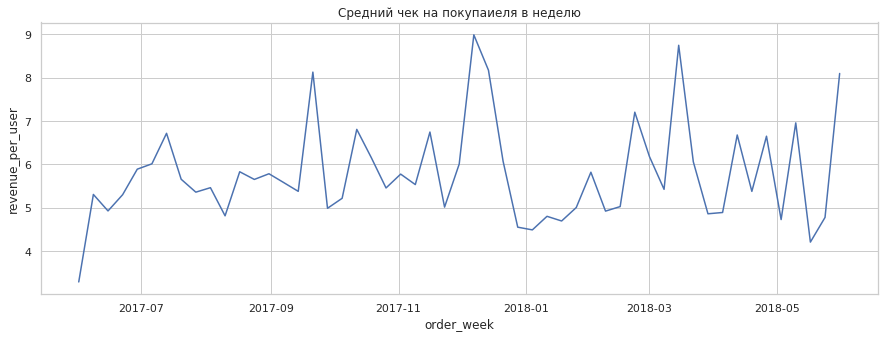

In [104]:
revenue_weekly = orders_log_data.groupby('order_week').agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
revenue_weekly.columns = ['order_week', 'weekly_revenue', 'number_of_users']
revenue_weekly['revenue_per_user'] = revenue_weekly['weekly_revenue']/revenue_weekly['number_of_users']
fig = plt.figure(figsize = (15,5))
sns.lineplot(data = revenue_weekly, x='order_week', markers=True, y='revenue_per_user', palette='deep').set_title("Средний чек на покупаиеля в неделю")

Text(0.5, 1.0, 'Средний чек на покупаиеля в месяц')

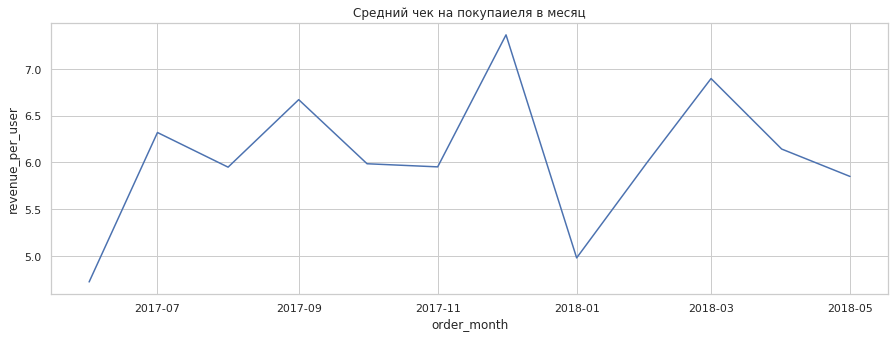

In [105]:
revenue_monthly = orders_log_data.groupby('order_month').agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
revenue_monthly.columns = ['order_month', 'monthly_revenue', 'number_of_users']
revenue_monthly['revenue_per_user'] = revenue_monthly['monthly_revenue']/revenue_monthly['number_of_users']
fig = plt.figure(figsize = (15,5))
sns.lineplot(data = revenue_monthly, x='order_month', markers=True, y='revenue_per_user', palette='deep').set_title("Средний чек на покупателя в месяц")

In [106]:
revenue_daily['revenue_per_user'].mean()

5.336195025387738

In [107]:
revenue_weekly['revenue_per_user'].mean()

5.776272399265334

In [108]:
revenue_monthly['revenue_per_user'].mean()

6.070389762358384

### Временные когорты (LTV, CAC, ROMI)

In [109]:
display(orders_log_data.head())

,buy_ts,revenue,uid,order_month,order_week,order_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [110]:
users.head()

,uid,first_activity_month,first_source,first_device
0,11863502262781,2018-03-01,3,touch
1,49537067089222,2018-02-01,2,touch
2,297729379853735,2017-06-01,3,desktop
3,313578113262317,2017-09-01,2,desktop
4,325320750514679,2017-09-01,5,desktop


In [111]:
orders_log_data = orders_log_data.merge(users, on = 'uid')
display(orders_log_data.head(3))

,buy_ts,revenue,uid,order_month,order_week,order_day,first_activity_month,first_source,first_device
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,1,desktop
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2,desktop
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2,desktop


In [112]:
cohort_sizes = orders_log_data.groupby('first_activity_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_activity_month', 'n_buyers']
print(cohort_sizes.head(5))

  first_activity_month  n_buyers
0           2017-06-01      2923
1           2017-07-01      2458
2           2017-08-01      1721
3           2017-09-01      3058
4           2017-10-01      4678


In [113]:
#Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку
#cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts = orders_log_data.groupby(['first_activity_month','order_month']).agg({'revenue': 'sum'}).reset_index()
print(cohorts.head())

  first_activity_month order_month  revenue
0           2017-06-01  2017-06-01  9557.49
1           2017-06-01  2017-07-01  2664.58
2           2017-06-01  2017-08-01  1464.69
3           2017-06-01  2017-09-01  3882.09
4           2017-06-01  2017-10-01  3940.59


In [114]:
cohorts.groupby('first_activity_month')['revenue'].mean()

first_activity_month
2017-06-01     3335.504167
2017-07-01     1619.282727
2017-08-01     1346.187000
2017-09-01     3742.506667
2017-10-01     3482.211250
2017-11-01     3489.531429
2017-12-01     5192.975000
2018-01-01     2909.364000
2018-02-01     3765.322500
2018-03-01     4590.053333
2018-04-01     4941.275000
2018-05-01    10368.110000
Name: revenue, dtype: float64

In [115]:
#Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц
report = pd.merge(cohort_sizes, cohorts, on='first_activity_month')
print(report.head())

  first_activity_month  n_buyers order_month  revenue
0           2017-06-01      2923  2017-06-01  9557.49
1           2017-06-01      2923  2017-07-01  2664.58
2           2017-06-01      2923  2017-08-01  1464.69
3           2017-06-01      2923  2017-09-01  3882.09
4           2017-06-01      2923  2017-10-01  3940.59


In [116]:
margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_activity_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
print(report.head())

  first_activity_month  n_buyers order_month  revenue       gp  age
0           2017-06-01      2923  2017-06-01  9557.49  9557.49    0
1           2017-06-01      2923  2017-07-01  2664.58  2664.58    1
2           2017-06-01      2923  2017-08-01  1464.69  1464.69    2
3           2017-06-01      2923  2017-09-01  3882.09  3882.09    3
4           2017-06-01      2923  2017-10-01  3940.59  3940.59    4


In [117]:
#Найдем ltv
report['ltv'] = report['gp'] / report['n_buyers']
print(report.head(5))

  first_activity_month  n_buyers order_month  revenue       gp  age       ltv
0           2017-06-01      2923  2017-06-01  9557.49  9557.49    0  3.269754
1           2017-06-01      2923  2017-07-01  2664.58  2664.58    1  0.911591
2           2017-06-01      2923  2017-08-01  1464.69  1464.69    2  0.501091
3           2017-06-01      2923  2017-09-01  3882.09  3882.09    3  1.328118
4           2017-06-01      2923  2017-10-01  3940.59  3940.59    4  1.348132


In [118]:
output = report.pivot_table(
        index='first_activity_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
    

output.cumsum(axis=1).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,3.27,4.18,4.68,6.01,7.36,8.33,9.52,10.3,11.09,12.28,13.03,13.69
2017-07-01,4.02,4.45,4.9,5.3,5.64,5.96,6.2,6.51,6.8,7.04,7.23,
2017-08-01,3.62,4.2,4.78,5.33,5.8,6.11,6.39,7.11,7.59,7.81,,
2017-09-01,4.04,5.25,5.94,9.35,9.77,10.39,10.71,10.87,11.01,,,
2017-10-01,3.93,4.74,5.02,5.25,5.47,5.69,5.81,5.95,,,,
2017-11-01,3.88,4.51,4.83,5.15,5.41,5.58,5.74,,,,,
2017-12-01,4.14,4.57,5.6,6.86,7.22,7.66,,,,,,
2018-01-01,3.40,4.03,4.4,4.5,4.67,,,,,,,
2018-02-01,3.61,4.23,4.44,4.72,,,,,,,,


 - Сколько денег потратили? Всего / на каждый источник / по времени
 - Сколько стоило привлечение одного покупателя из каждого источника? CAC
 - На сколько окупились расходы? (ROI)

## <span style="color:green">Отличная работа<span>
    Идеальный расчёт🤚

In [119]:
costs_data['source_id'].value_counts().T

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

In [120]:
costs_data.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [121]:
costs_data['month'] = costs_data['dt'].astype('datetime64[M]')

Text(0.5, 1.0, 'Затраты по месяцам')

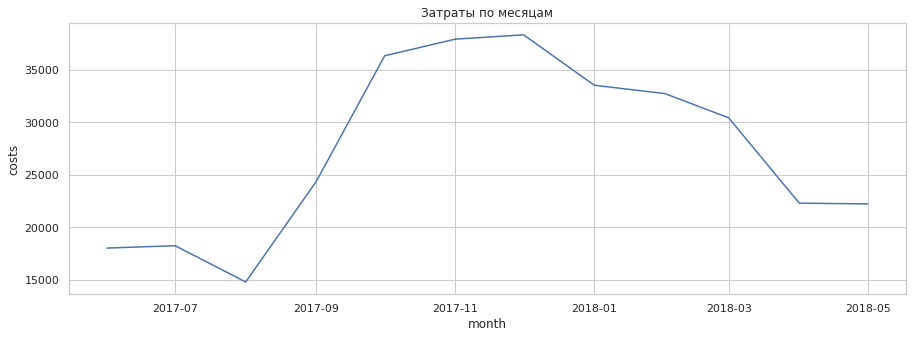

In [122]:
costs_by_month = costs_data.groupby(['month'])['costs'].sum().reset_index()
fig = plt.figure(figsize = (15,5))
sns.lineplot(data = costs_by_month, x='month', markers=True, y='costs', palette='deep').set_title("Затраты по месяцам")

## <span style="color:red">Что нужно доработать<span>

Кажется, пропущены ответы на вопросы:
1. Сколько денег потратили? Всего / на каждый источник / по времени
2. Сколько стоило привлечение одного покупателя из каждого источника?

## <span style="color: purple">Мои комментарии<span>
    CAC по источникам посчитан в ROMI по source 

In [123]:
print('Всего потрачено {:.2f}'.format(costs_data['costs'].sum()))

Всего потрачено 329131.62


In [124]:
costs_data.groupby('source_id').sum()

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Text(0.5, 1.0, 'Затраты по месяцам и источникам')

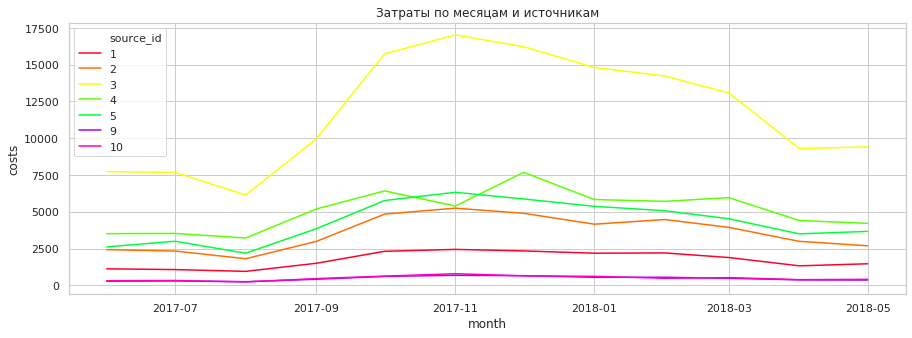

In [125]:
costs_by_month_and_source = costs_data.groupby(['source_id', 'month'])['costs'].sum().reset_index()

fig = plt.figure(figsize = (15,5))
sns.lineplot(data = costs_by_month_and_source, x='month', hue='source_id', markers=True, y='costs', palette='gist_rainbow', legend='full').set_title("Затраты по месяцам и источникам")

### ROMI по месячным когортам

In [126]:
report_new = pd.merge(report, costs_by_month, left_on='first_activity_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
display(report_new.head())

,first_activity_month,n_buyers,order_month,revenue,gp,age,ltv,month,costs,cac
0,2017-06-01,2923,2017-06-01,9557.49,9557.49,0,3.269754,2017-06-01,18015.0,6.163189
1,2017-06-01,2923,2017-07-01,2664.58,2664.58,1,0.911591,2017-06-01,18015.0,6.163189
2,2017-06-01,2923,2017-08-01,1464.69,1464.69,2,0.501091,2017-06-01,18015.0,6.163189
3,2017-06-01,2923,2017-09-01,3882.09,3882.09,3,1.328118,2017-06-01,18015.0,6.163189
4,2017-06-01,2923,2017-10-01,3940.59,3940.59,4,1.348132,2017-06-01,18015.0,6.163189


In [127]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
outputROMI = report_new.pivot_table(
        index='first_activity_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean').round(2)

outputROMI.cumsum(axis=1).fillna('')


age,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,0.53,0.68,0.76,0.98,1.2,1.36,1.55,1.68,1.81,2,2.12,2.23
2017-07-01,0.54,0.6,0.66,0.71,0.76,0.8,0.83,0.87,0.91,0.94,0.97,
2017-08-01,0.42,0.49,0.56,0.62,0.67,0.71,0.74,0.82,0.88,0.91,,
2017-09-01,0.51,0.66,0.75,1.18,1.23,1.31,1.35,1.37,1.39,,,
2017-10-01,0.51,0.61,0.65,0.68,0.71,0.74,0.76,0.78,,,,
2017-11-01,0.44,0.51,0.55,0.59,0.62,0.64,0.66,,,,,
2017-12-01,0.44,0.49,0.6,0.73,0.77,0.82,,,,,,
2018-01-01,0.32,0.38,0.41,0.42,0.44,,,,,,,
2018-02-01,0.35,0.41,0.43,0.46,,,,,,,,


In [128]:
outputROMI.cumsum(axis=1).mean(axis=0).T

age
0     0.440000
1     0.517273
2     0.582000
3     0.707778
4     0.800000
5     0.911429
6     0.981667
7     1.104000
8     1.247500
9     1.283333
10    1.545000
11    2.230000
dtype: float64

В серднем окупаются на 7 месяц существования.

### LTV по девайсам

In [129]:
cohort_sizes_device = orders_log_data.groupby(['first_device', 'first_activity_month']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes_device.columns = ['first_device', 'first_activity_month', 'n_buyers']
print(cohort_sizes_device.head(5))

  first_device first_activity_month  n_buyers
0      desktop           2017-06-01      2387
1      desktop           2017-07-01      1918
2      desktop           2017-08-01      1390
3      desktop           2017-09-01      2416
4      desktop           2017-10-01      3800


In [130]:
cohorts_device = orders_log_data.groupby(['first_device', 'first_activity_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
print(cohorts_device.head())

  first_device first_activity_month order_month  revenue
0      desktop           2017-06-01  2017-06-01  8321.37
1      desktop           2017-06-01  2017-07-01  2314.93
2      desktop           2017-06-01  2017-08-01  1314.49
3      desktop           2017-06-01  2017-09-01  3699.67
4      desktop           2017-06-01  2017-10-01  3539.16


In [131]:
report_device = pd.merge(cohort_sizes_device, cohorts_device, on='first_device')
display(report_device.loc[report_device['first_activity_month_x']== '2017-07-01'])

,first_device,first_activity_month_x,n_buyers,first_activity_month_y,order_month,revenue
78,desktop,2017-07-01,1918,2017-06-01,2017-06-01,8321.37
79,desktop,2017-07-01,1918,2017-06-01,2017-07-01,2314.93
80,desktop,2017-07-01,1918,2017-06-01,2017-08-01,1314.49
81,desktop,2017-07-01,1918,2017-06-01,2017-09-01,3699.67
82,desktop,2017-07-01,1918,2017-06-01,2017-10-01,3539.16
...,...,...,...,...,...,...
1087,touch,2017-07-01,540,2018-03-01,2018-04-01,168.51
1088,touch,2017-07-01,540,2018-03-01,2018-05-01,77.66
1089,touch,2017-07-01,540,2018-04-01,2018-04-01,1393.41
1090,touch,2017-07-01,540,2018-04-01,2018-05-01,127.56


In [132]:
report_device['gp'] = report_device['revenue'] * margin_rate
report_device['age'] = report_device['order_month'] - report_device['first_activity_month_y']
report_device['age'] = report_device['age']/ np.timedelta64(1, 'M')
report_device['age'] = report_device['age'].round().astype('int')
report_device['ltv'] = report_device['gp'] / report_device['n_buyers']
display(report_device.head(20))

,first_device,first_activity_month_x,n_buyers,first_activity_month_y,order_month,revenue,gp,age,ltv
0,desktop,2017-06-01,2387,2017-06-01,2017-06-01,8321.37,8321.37,0,3.486121
1,desktop,2017-06-01,2387,2017-06-01,2017-07-01,2314.93,2314.93,1,0.969807
2,desktop,2017-06-01,2387,2017-06-01,2017-08-01,1314.49,1314.49,2,0.550687
3,desktop,2017-06-01,2387,2017-06-01,2017-09-01,3699.67,3699.67,3,1.549925
4,desktop,2017-06-01,2387,2017-06-01,2017-10-01,3539.16,3539.16,4,1.482681
5,desktop,2017-06-01,2387,2017-06-01,2017-11-01,2446.31,2446.31,5,1.024847
6,desktop,2017-06-01,2387,2017-06-01,2017-12-01,3183.64,3183.64,6,1.333741
7,desktop,2017-06-01,2387,2017-06-01,2018-01-01,2131.73,2131.73,7,0.893058
8,desktop,2017-06-01,2387,2017-06-01,2018-02-01,2105.48,2105.48,8,0.882061
9,desktop,2017-06-01,2387,2017-06-01,2018-03-01,2696.60,2696.60,9,1.129703


In [133]:
output_device_ltv = report_device.pivot_table(
        index='first_device', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
    
output_device_ltv.cumsum(axis=1).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_device,,,,,,,,,,,,
desktop,4.38,5.13,5.71,6.88,7.43,7.97,8.41,8.79,9.16,9.69,10.22,10.98
touch,3.76,4.57,4.95,5.27,5.55,5.86,6.12,6.54,6.97,7.51,7.77,8.18


Десктоп приносит деньги быстрее touch.

### SOURCE

In [134]:
#costs_by_month_and_source = costs_data.groupby(['source_id', 'month'])['costs'].sum().reset_index()

#fig = plt.figure(figsize = (15,5))
#sns.lineplot(data = costs_by_month_and_source, x='month', hue='source_id', markers=True, y='costs', palette='gist_rainbow', legend='full',)

In [135]:
cohort_sizes_source = orders_log_data.groupby(['first_source', 'first_activity_month']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes_source.columns = ['first_source', 'first_activity_month', 'n_buyers']
cohorts_source = orders_log_data.groupby(['first_source', 'first_activity_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
print(cohorts_source.head())


   first_source first_activity_month order_month  revenue
0             1           2017-06-01  2017-06-01  1378.70
1             1           2017-06-01  2017-07-01   662.73
2             1           2017-06-01  2017-08-01   683.12
3             1           2017-06-01  2017-09-01  1613.45
4             1           2017-06-01  2017-10-01  1055.58


In [136]:
report_source = pd.merge(cohort_sizes_source, cohorts_source, on='first_source')
report_source['gp'] = report_source['revenue'] * margin_rate
report_source['age'] = report_source['order_month'] - report_source['first_activity_month_y']
report_source['age'] = report_source['age']/ np.timedelta64(1, 'M')
report_source['age'] = report_source['age'].round().astype('int')
report_source['ltv'] = report_source['gp'] / report_source['n_buyers']

In [137]:
display(report_source.head(5))

,first_source,first_activity_month_x,n_buyers,first_activity_month_y,order_month,revenue,gp,age,ltv
0,1,2017-06-01,240,2017-06-01,2017-06-01,1378.70,1378.70,0,5.744583
1,1,2017-06-01,240,2017-06-01,2017-07-01,662.73,662.73,1,2.761375
2,1,2017-06-01,240,2017-06-01,2017-08-01,683.12,683.12,2,2.846333
3,1,2017-06-01,240,2017-06-01,2017-09-01,1613.45,1613.45,3,6.722708
4,1,2017-06-01,240,2017-06-01,2017-10-01,1055.58,1055.58,4,4.398250


In [138]:
output_source_ltv = report_source.pivot_table(
        index='first_source', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
    
output_source_ltv.cumsum(axis=1).fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_source,,,,,,,,,,,,
1,5.46,6.53,7.34,8.71,9.66,10.38,11.08,13.07,14.48,15.79,17.65,20.01
2,5.63,7.71,9.99,12.71,14.22,15.55,16.32,16.91,17.62,18.82,20.06,21.51
3,4.02,4.71,5.03,5.35,5.67,5.92,6.15,6.3,6.46,6.59,6.72,6.91
4,4.09,4.62,4.9,5.2,5.49,5.89,6.34,6.53,6.84,7.44,7.96,8.96
5,4.52,5.11,5.49,7.76,8.17,8.75,9.11,9.46,9.72,10.21,10.34,10.49
7,1.22,,,,,,,,,,,
9,3.51,4.53,5.55,6.55,7.56,8.13,8.95,9.66,10.88,11.85,12.37,12.65
10,3.15,3.44,3.59,3.68,3.94,4.11,4.24,4.31,4.33,4.39,4.47,4.57


Больше всего денег приносит первый и второй источники.

In [139]:
report_ROMI_source = pd.merge(report_source, costs_by_month_and_source, left_on=['first_activity_month_x', 'first_source'], right_on=['month', 'source_id'])
report_ROMI_source['cac'] = report_ROMI_source['costs'] / report_ROMI_source['n_buyers']
display(report_ROMI_source)

,first_source,first_activity_month_x,n_buyers,first_activity_month_y,order_month,revenue,gp,age,ltv,source_id,month,costs,cac
0,1,2017-06-01,240,2017-06-01,2017-06-01,1378.70,1378.70,0,5.744583,1,2017-06-01,1125.61,4.690042
1,1,2017-06-01,240,2017-06-01,2017-07-01,662.73,662.73,1,2.761375,1,2017-06-01,1125.61,4.690042
2,1,2017-06-01,240,2017-06-01,2017-08-01,683.12,683.12,2,2.846333,1,2017-06-01,1125.61,4.690042
3,1,2017-06-01,240,2017-06-01,2017-09-01,1613.45,1613.45,3,6.722708,1,2017-06-01,1125.61,4.690042
4,1,2017-06-01,240,2017-06-01,2017-10-01,1055.58,1055.58,4,4.398250,1,2017-06-01,1125.61,4.690042
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6451,10,2018-05-01,101,2018-03-01,2018-04-01,22.42,22.42,1,0.221980,10,2018-05-01,409.86,4.058020
6452,10,2018-05-01,101,2018-03-01,2018-05-01,7.62,7.62,2,0.075446,10,2018-05-01,409.86,4.058020
6453,10,2018-05-01,101,2018-04-01,2018-04-01,237.44,237.44,0,2.350891,10,2018-05-01,409.86,4.058020
6454,10,2018-05-01,101,2018-04-01,2018-05-01,21.26,21.26,1,0.210495,10,2018-05-01,409.86,4.058020


In [140]:
report_ROMI_source.groupby('source_id')['cac'].mean().round(2)

source_id
1      7.23
2     12.68
3     13.76
4      6.18
5      7.68
9      7.65
10     4.73
Name: cac, dtype: float64

Дороже всего стоили пользователи из 2 и 3 источника( их привлечение стоило около 13 у.е), дешевле всего 10 источник (5у. е)

In [141]:
report_ROMI_source['romi'] = report_ROMI_source['ltv'] / report_ROMI_source['cac']
outputROMI = report_ROMI_source.pivot_table(
        index='first_source', 
        columns='age', 
        values='romi', 
        aggfunc='mean').round(2)

outputROMI.cumsum(axis=1).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_source,,,,,,,,,,,,
1,0.77,0.92,1.03,1.22,1.36,1.46,1.56,1.84,2.04,2.23,2.49,2.83
2,0.47,0.64,0.83,1.06,1.18,1.29,1.35,1.40,1.46,1.56,1.66,1.78
3,0.30,0.35,0.37,0.39,0.41,0.43,0.45,0.46,0.47,0.48,0.49,0.50
4,0.66,0.75,0.79,0.84,0.89,0.95,1.02,1.05,1.10,1.20,1.28,1.44
5,0.62,0.70,0.75,1.06,1.12,1.20,1.25,1.30,1.34,1.41,1.43,1.45
9,0.48,0.62,0.76,0.90,1.04,1.12,1.23,1.33,1.50,1.63,1.70,1.74
10,0.68,0.74,0.77,0.79,0.85,0.89,0.92,0.93,0.93,0.94,0.96,0.98


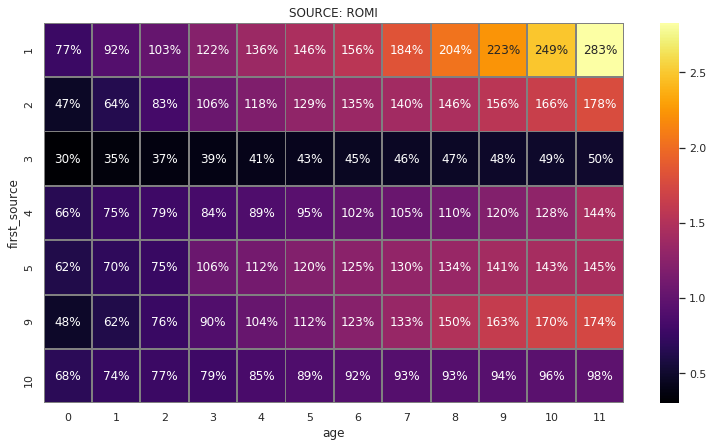

In [142]:
outputROMI_cum = outputROMI.cumsum(axis=1).fillna('')
plt.figure(figsize=(13, 7))
plt.title('SOURCE: ROMI')
sns.heatmap(outputROMI_cum, annot=True, fmt='.0%', linewidths=1, linecolor='gray', cmap='inferno')

Лучшие показатели окупаемости у первого источника (к концу 11 жизни окупается на 283%), на втором месте 2 (178%) и 3 источник (174%). Третий к концу 11 периода окупается лишь на 50%, 10 выходит в ноль.

# Выводы

- Трафик по десктопу больше траффика по мобайлу. На дневном графике виден пиковый день в 24 ноября 2017 года, и провальный день в апреле. Возможно в этот день сайт просто лег. Если смотреть динамику по месяцам, то с июгя по ноябрь наблюдается рост сайта, а затем плавное снижение.
- Наибольшее количество посетителей пользовались (37%), 3(33%) и 5 (25%) источником (Посетили могут пользоваться разными источниками)

- Среднее количество сессиий в день 987. Самые длинные сессии из из 1 (17 мин.), второго (14 мин) и 10 источников (11 минут), самые коротки из 4 и 5 (9 минут). На десктопе люди проводят больше времени (почти 12 минут, в то время как на touch в среднем 8 минут). 

- Retention rate. Если смотерть на 5 период жизни, то по имеющимся данным retention падает с 7 июньской когорты на 2 процентов в декабрьской когорте. Пользователи desktop возвразаются немного чаще, чем пользователи touch. Разнцица составляет коло 0.5%. Лучше всего себя показал первый, второй и девятый источник. В первый месяц в этих когортах вернулись около 10%, в то время как из других источников около 5%.

- В среднем посетители совершают 139 покупок в день(все вместе), в неделю 951, в месяц 4201. Динамика покупок соответсвует динамике посещений.
- У половины покупателей на покупку уходит не более 16 минут, но есть большая группа людей у которых на покупки уходит больше одного дня (28%).
 
- Средний чек в день 5.3 у. е., в месяц 6 у.е.
- В серднем пользователи окупаются на 7 месяц существования. Но быстрее вех окупились июньская и сентябрьская когорты.
- Дороже всего стоили пользователи из 2 и 3 источника( их привлечение стоило около 13 у.е), дешевле всего 10 источник (5у. е). При этом лучшие показатели окупаемости у первого источника (к концу 11 жизни окупается на 283%), на втором месте 2 (178%) и 3 источник (174%). Третий к концу 11 периода окупается лишь на 50%, 10 выходит в ноль.

----------

## Общий комментарий

Спасибо за проделанную работу👍

Благодарю за расширенный вывод, хорошо, когда вся информация в одном месте👌

В работе остались неотвеченные вопросы, пожалуйста доработай их🤝

Также необходимо проработать отмеченные пункты для доработки.

**Главное**
 - Попробуем действовать по правилу - «Появился график - создаем заголовок и человекочитаемые и понятные подписи для осей», чтобы коллегам было проще ориентироваться
 
**Улучшения**
 - для более гибкого вывода текста можно использовать:
  - строковый метод `format`
  - оператор `%`
  - f-строки
 - Чтобы на графике не было длинных подписей наименований когорт. Их можно перевести в строковый тип с помощью метода `dt.strftime()`. Загляни в документацию https://strftime.org/
 - чтобы предупреждения в коде не отвлекали, рекомендую попробовать библиотеку `warnings`. Пара строчек кода настроит простой фильтр для игнорирования предупреждений - `import warnings` `warnings.simplefilter("ignore")`